In [19]:
from dataclasses import dataclass
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

In [20]:
@dataclass
class Trajectory:
    x: float
    y: float
    z: float
    t: float

In [46]:
trajs = defaultdict(list)
with open("./logs/3.csv") as file:
    for line in file:
        info = [float(x) for x in line.split(", ")]
        info[0] = int(info[0])
        trajs[info[0]].append( Trajectory(*info[1:]) )
        
with open("./logs/4.csv") as file:
    for line in file:
        info = [float(x) for x in line.split(", ")]
        info[0] = int(info[0])
        trajs[info[0]].append( Trajectory(*info[1:]) )

In [47]:
[len(trajs[i]) for i in trajs.keys()]

[238, 238]

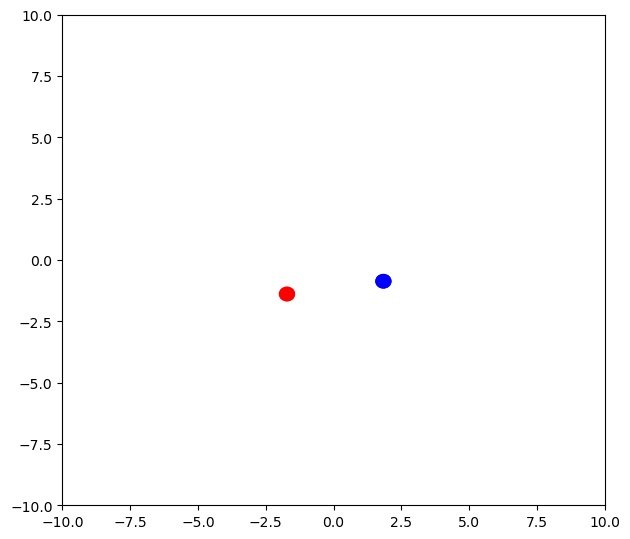

In [49]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)
colors = ["red", "blue", "yellow"]

ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))

patches = []
for i, idx in enumerate(trajs):
    patches.append(plt.Circle(
        (trajs[idx][0].x, trajs[idx][0].y),
        0.30,
        fc=colors[i]
    ))

def init():
    for patch in patches:
        ax.add_patch(patch)
        
    return patches

def animate(i):
    for j, idx in enumerate(trajs):
        if len(trajs[idx]) > i:
            patches[j].center = (
                trajs[idx][i].x,
                trajs[idx][i].y,
            )
        else:
            patches[j].center = (100, 100)


        
    return patches

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=238, 
                               interval=20,
                               blit=True)

HTML(anim.to_html5_video())